



# **Analytics 2 :** <font color=#DF4807>**Extracting Meaning from Text**</font>





**Objectives**:
1. Analysis of UN General debates dataset
2. Information extraction from speeches of selected country

Download the data from my drive at the following link:

https://drive.google.com/file/d/1fqnrRjz6i9zNximX3UqP_5dhL60AIbJo/view?usp=sharing


In [1]:
#import  libraries
import pandas as pd

In [2]:
#import data by navigating to the correct location on your gooogle drive.
df_all = pd.read_csv('UNGeneralAssembly.csv')
df_all.head()

,session,year,country,text
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...
4,44,1989,ZWE,﻿I should like at the outset to express my del...


Every year, representatives of UN member states gather and deliver speeches that present their government’s viewpoints on global and domestic issues.
The dataset we will use contains speeches from the member states dating back from 1970 until 2016.


**Your tasks:**

1) Choose either your own country or a country you are interested in and extract all the speeches delivered over the years.

2) What have been the top 10 most frequent words over time? In other words, do the most frequent words used, reflect the mindset of that country in the given time?

2) Can you classify the speeches using the NER tags and draw any interesting conlusions?

4) Using cosine similarities and tfidf, can you determine which other country has the same outlook as the countyr you have selected? Can you determine allies from enemies this way?

5) Any exploratory analysis you like.

In [3]:
#task 1 : Choosing INDIA
df = df_all[df_all["country"] == "IND"]
df = df.reset_index(drop=True)
df.head(5)

,session,year,country,text
0,44,1989,IND,﻿\nMy delegation warmly welcomes the assumptio...
1,25,1970,IND,"40.\t Mr. President, I offer you our congratul..."
2,68,2013,IND,"Let me first of all congratulate \nyou, Mr. Pr..."
3,40,1985,IND,"Sir, I should like to begin by congratulating ..."
4,63,2008,IND,"May I first congratulate you, \nSir, on your e..."


In [4]:
# Removing special characters
df['text'] = df['text'].str.replace('[^a-zA-Z\s]', '', regex=True)
df.head(5)

,session,year,country,text
0,44,1989,IND,\nMy delegation warmly welcomes the assumption...
1,25,1970,IND,\t Mr President I offer you our congratulation...
2,68,2013,IND,Let me first of all congratulate \nyou Mr Pres...
3,40,1985,IND,Sir I should like to begin by congratulating y...
4,63,2008,IND,May I first congratulate you \nSir on your ele...


In [5]:
import re

# Define a function to remove newline and tab characters
def remove_newline_tab_characters(text):
    cleaned_text = re.sub(r'[\n\t]', ' ', text)
    return cleaned_text

# Apply the function to the 'text' column to create a new 'cleaned_text' column
df['cleaned_text'] = df['text'].apply(remove_newline_tab_characters)
df.head()

,session,year,country,text,cleaned_text
0,44,1989,IND,\nMy delegation warmly welcomes the assumption...,My delegation warmly welcomes the assumption ...
1,25,1970,IND,\t Mr President I offer you our congratulation...,Mr President I offer you our congratulations...
2,68,2013,IND,Let me first of all congratulate \nyou Mr Pres...,Let me first of all congratulate you Mr Presi...
3,40,1985,IND,Sir I should like to begin by congratulating y...,Sir I should like to begin by congratulating y...
4,63,2008,IND,May I first congratulate you \nSir on your ele...,May I first congratulate you Sir on your elec...


In [6]:
# Lowercase
df['cleaned_text'] = df['cleaned_text'].str.lower()
df.head(5)

,session,year,country,text,cleaned_text
0,44,1989,IND,\nMy delegation warmly welcomes the assumption...,my delegation warmly welcomes the assumption ...
1,25,1970,IND,\t Mr President I offer you our congratulation...,mr president i offer you our congratulations...
2,68,2013,IND,Let me first of all congratulate \nyou Mr Pres...,let me first of all congratulate you mr presi...
3,40,1985,IND,Sir I should like to begin by congratulating y...,sir i should like to begin by congratulating y...
4,63,2008,IND,May I first congratulate you \nSir on your ele...,may i first congratulate you sir on your elec...


In [7]:
# Tokenize
import spacy

nlp = spacy.load("en_core_web_sm")
# Tokenize text into words
# df['text_words'] = df['text'].apply(lambda text: [token.text for token in nlp(text)])
df['tokens'] = df['cleaned_text'].apply(nlp)
df.head()

,session,year,country,text,cleaned_text,tokens
0,44,1989,IND,\nMy delegation warmly welcomes the assumption...,my delegation warmly welcomes the assumption ...,"( , my, delegation, warmly, welcomes, the, ass..."
1,25,1970,IND,\t Mr President I offer you our congratulation...,mr president i offer you our congratulations...,"( , mr, president, i, offer, you, our, congra..."
2,68,2013,IND,Let me first of all congratulate \nyou Mr Pres...,let me first of all congratulate you mr presi...,"(let, me, first, of, all, congratulate, , you..."
3,40,1985,IND,Sir I should like to begin by congratulating y...,sir i should like to begin by congratulating y...,"(sir, i, should, like, to, begin, by, congratu..."
4,63,2008,IND,May I first congratulate you \nSir on your ele...,may i first congratulate you sir on your elec...,"(may, i, first, congratulate, you, , sir, on,..."


In [8]:
df.drop("cleaned_text", inplace=True, axis=1)
df.head()

,session,year,country,text,tokens
0,44,1989,IND,\nMy delegation warmly welcomes the assumption...,"( , my, delegation, warmly, welcomes, the, ass..."
1,25,1970,IND,\t Mr President I offer you our congratulation...,"( , mr, president, i, offer, you, our, congra..."
2,68,2013,IND,Let me first of all congratulate \nyou Mr Pres...,"(let, me, first, of, all, congratulate, , you..."
3,40,1985,IND,Sir I should like to begin by congratulating y...,"(sir, i, should, like, to, begin, by, congratu..."
4,63,2008,IND,May I first congratulate you \nSir on your ele...,"(may, i, first, congratulate, you, , sir, on,..."


In [9]:
# Remove STOP words

# Define a function to remove stop words using spaCy
def remove_stopwords(text_words):
    filtered_words = [token.text for token in text_words if not token.is_stop]
    return filtered_words

# Apply the function to the 'text_words' column
df['tokens'] = df['tokens'].apply(remove_stopwords)
df.head(5)


,session,year,country,text,tokens
0,44,1989,IND,\nMy delegation warmly welcomes the assumption...,"[ , delegation, warmly, welcomes, assumption, ..."
1,25,1970,IND,\t Mr President I offer you our congratulation...,"[ , mr, president, offer, congratulations, el..."
2,68,2013,IND,Let me first of all congratulate \nyou Mr Pres...,"[let, congratulate, , mr, president, election..."
3,40,1985,IND,Sir I should like to begin by congratulating y...,"[sir, like, begin, congratulating, unanimous, ..."
4,63,2008,IND,May I first congratulate you \nSir on your ele...,"[congratulate, , sir, election, president, as..."


In [10]:
# Removing empty tokens
def remove_empty_strings(text_words):
    return [word for word in text_words if word.strip()]

df['tokens'] = df['tokens'].apply(remove_empty_strings)
df.head(5)


,session,year,country,text,tokens
0,44,1989,IND,\nMy delegation warmly welcomes the assumption...,"[delegation, warmly, welcomes, assumption, amb..."
1,25,1970,IND,\t Mr President I offer you our congratulation...,"[mr, president, offer, congratulations, electi..."
2,68,2013,IND,Let me first of all congratulate \nyou Mr Pres...,"[let, congratulate, mr, president, election, p..."
3,40,1985,IND,Sir I should like to begin by congratulating y...,"[sir, like, begin, congratulating, unanimous, ..."
4,63,2008,IND,May I first congratulate you \nSir on your ele...,"[congratulate, sir, election, president, assem..."


In [11]:
from collections import Counter

# Group the DataFrame by 'year' and combine 'text_words' lists for each year
grouped = df.groupby('year')['tokens'].sum()

# Initialize a dictionary to store the top ten words per year
top_words_per_year = {}

# Iterate through each group
for year, text_words in grouped.items():
    word_counts = Counter(text_words)
    top_words = [word for word, count in word_counts.most_common(10)]
    top_words_per_year[year] = top_words

# top_words_per_year is a dictionary where keys are years and values are lists of the top ten words for each year
for year, top_words in top_words_per_year.items():
    print(f"Year {year}:")
    for i, word in enumerate(top_words, 1):
        print(f"{i}. {word}")
    print()

Year 1970:
1. nations
2. united
3. international
4. peace
5. countries
6. development
7. world
8. states
9. economic
10. disarmament

Year 1971:
1. pakistan
2. international
3. world
4. nations
5. assembly
6. refugees
7. united
8. people
9. new
10. countries

Year 1972:
1. countries
2. international
3. india
4. people
5. problems
6. time
7. peace
8. world
9. security
10. cooperation

Year 1973:
1. countries
2. world
3. united
4. nations
5. peace
6. states
7. developing
8. india
9. people
10. bangladesh

Year 1974:
1. world
2. countries
3. peace
4. people
5. nations
6. agreement
7. international
8. conference
9. welcome
10. progress

Year 1975:
1. nations
2. united
3. world
4. session
5. peace
6. countries
7. people
8. cooperation
9. problems
10. organization

Year 1976:
1. united
2. nations
3. countries
4. developing
5. peace
6. world
7. conference
8. independence
9. international
10. states

Year 1977:
1. nations
2. world
3. people
4. united
5. india
6. countries
7. economic
8. nuclea

In [12]:
# Function to extract bigrams from a list of tokens using spaCy
def extract_bigrams(token_list):
    bigrams = []
    doc = nlp(" ".join(token_list))
    for i in range(len(doc) - 1):
        bigrams.append((doc[i].text, doc[i + 1].text))
    return bigrams

# Create a new column 'Bigrams' containing bigrams
df['bigrams'] = df['tokens'].apply(extract_bigrams)
df.head()

,session,year,country,text,tokens,bigrams
0,44,1989,IND,\nMy delegation warmly welcomes the assumption...,"[delegation, warmly, welcomes, assumption, amb...","[(delegation, warmly), (warmly, welcomes), (we..."
1,25,1970,IND,\t Mr President I offer you our congratulation...,"[mr, president, offer, congratulations, electi...","[(mr, president), (president, offer), (offer, ..."
2,68,2013,IND,Let me first of all congratulate \nyou Mr Pres...,"[let, congratulate, mr, president, election, p...","[(let, congratulate), (congratulate, mr), (mr,..."
3,40,1985,IND,Sir I should like to begin by congratulating y...,"[sir, like, begin, congratulating, unanimous, ...","[(sir, like), (like, begin), (begin, congratul..."
4,63,2008,IND,May I first congratulate you \nSir on your ele...,"[congratulate, sir, election, president, assem...","[(congratulate, sir), (sir, election), (electi..."


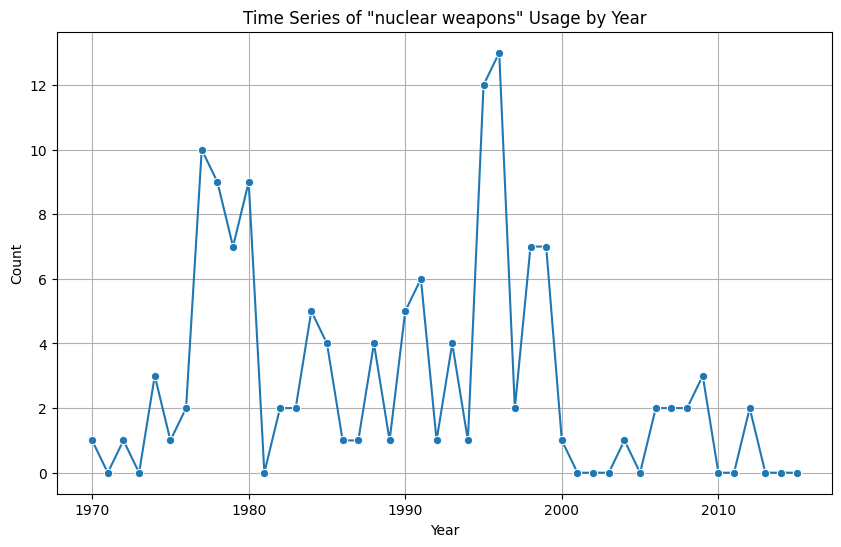

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the time series of a specific bigram
def plot_bigram_time_series(df, bigram):
    # Function to count the occurrences of bigram
    def count_bigram(bigram_list):
        return bigram_list.count(bigram)

    # Create a new column 'BigramCounts' with the counts of the specified bigram
    df['bigram_count'] = df['bigrams'].apply(count_bigram)

    # Group and sum the bigram counts by year
    bigram_counts_by_year = df.groupby('year')['bigram_count'].sum()

    # Create a time series plot
    years = bigram_counts_by_year.index
    counts = bigram_counts_by_year.values

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=years, y=counts, marker='o')
    plt.title(f'Time Series of "{bigram[0]} {bigram[1]}" Usage by Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

    df.drop('bigram_count', inplace=True, axis=1)

# Example usage
bigram_to_plot = ('nuclear', 'weapons')
plot_bigram_time_series(df, bigram_to_plot)


In [14]:
df.head()

,session,year,country,text,tokens,bigrams
0,44,1989,IND,\nMy delegation warmly welcomes the assumption...,"[delegation, warmly, welcomes, assumption, amb...","[(delegation, warmly), (warmly, welcomes), (we..."
1,25,1970,IND,\t Mr President I offer you our congratulation...,"[mr, president, offer, congratulations, electi...","[(mr, president), (president, offer), (offer, ..."
2,68,2013,IND,Let me first of all congratulate \nyou Mr Pres...,"[let, congratulate, mr, president, election, p...","[(let, congratulate), (congratulate, mr), (mr,..."
3,40,1985,IND,Sir I should like to begin by congratulating y...,"[sir, like, begin, congratulating, unanimous, ...","[(sir, like), (like, begin), (begin, congratul..."
4,63,2008,IND,May I first congratulate you \nSir on your ele...,"[congratulate, sir, election, president, assem...","[(congratulate, sir), (sir, election), (electi..."


2) Can you classify the speeches using the NER tags and draw any interesting conlusions?

In [15]:
# Extract NER tags from tokens
def extract_ner_tags(tokens):
    text = " ".join(tokens)
    doc = nlp(text)
    ner_tags = [(ent.text, ent.label_) for ent in doc.ents]
    return ner_tags

df['ner_tags'] = df['tokens'].apply(extract_ner_tags)


In [16]:
df.head()

,session,year,country,text,tokens,bigrams,ner_tags
0,44,1989,IND,\nMy delegation warmly welcomes the assumption...,"[delegation, warmly, welcomes, assumption, amb...","[(delegation, warmly), (warmly, welcomes), (we...","[(garba stewardship, PERSON), (year, DATE), (u..."
1,25,1970,IND,\t Mr President I offer you our congratulation...,"[mr, president, offer, congratulations, electi...","[(mr, president), (president, offer), (offer, ...","[(norway, GPE), (brooks randolph, PERSON), (to..."
2,68,2013,IND,Let me first of all congratulate \nyou Mr Pres...,"[let, congratulate, mr, president, election, p...","[(let, congratulate), (congratulate, mr), (mr,...",[(united nations advancing international peace...
3,40,1985,IND,Sir I should like to begin by congratulating y...,"[sir, like, begin, congratulating, unanimous, ...","[(sir, like), (like, begin), (begin, congratul...","[(united nations general assembly fortieth, OR..."
4,63,2008,IND,May I first congratulate you \nSir on your ele...,"[congratulate, sir, election, president, assem...","[(congratulate, sir), (sir, election), (electi...","[(today, DATE), (united nations, ORG), (reform..."


C:\Users\sruja\AppData\Local\Temp\ipykernel_20196\859737460.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(top_persons.values()), y=list(top_persons.keys()), palette="coolwarm")


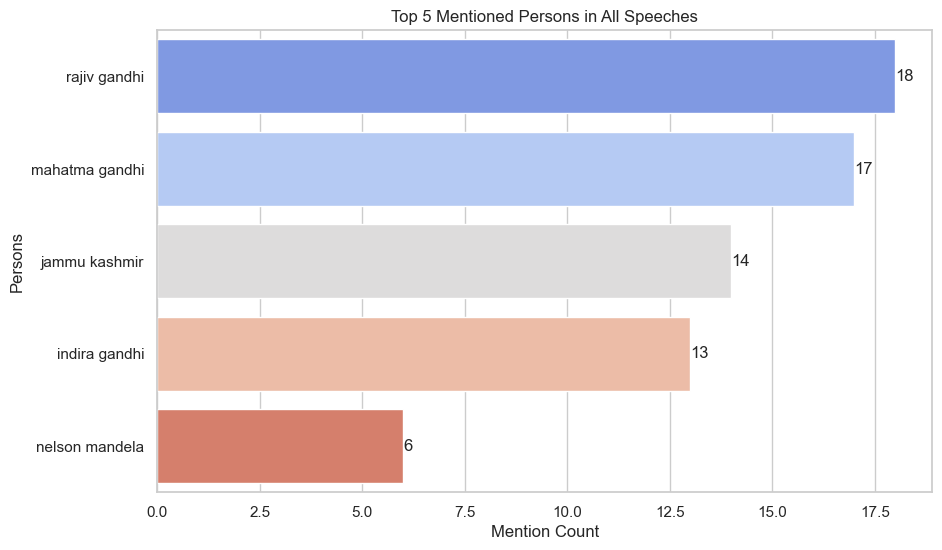

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to count and rank mentions of PERSON entities
def count_person_mentions(data):
    person_counts = {}
    for _, row in data.iterrows():
        for entity, tag in row['ner_tags']:
            if tag == 'PERSON':
                if entity in person_counts:
                    person_counts[entity] += 1
                else:
                    person_counts[entity] = 1
    return person_counts

person_mentions = count_person_mentions(df)

# Top N most mentioned persons
top_n = 5
top_persons = dict(sorted(person_mentions.items(), key=lambda item: item[1], reverse=True)[:top_n])

# Bar chart
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=list(top_persons.values()), y=list(top_persons.keys()), palette="coolwarm")

plt.title(f"Top {top_n} Mentioned Persons in All Speeches")
plt.xlabel("Mention Count")
plt.ylabel("Persons")

# Labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.0f}', ha='left', va='center')

plt.show()


jammu kashmir is wrongly categorized as PERSON, so correcting it

In [18]:
# Define the incorrect entity and the correct entity type
incorrect_entity = "jammu kashmir"
correct_entity_type = "GEOLOCATION"

# Function to correct the NER tags
def correct_ner_tags(data, incorrect_entity, correct_entity_type):
    for i, row in data.iterrows():
        # Iterate through the NER tags for each document
        updated_ner_tags = []  # Updated NER tags for the current document
        for entity, tag in row['ner_tags']:
            if entity == incorrect_entity and tag == 'PERSON':
                updated_ner_tags.append((entity, correct_entity_type))
            else:
                updated_ner_tags.append((entity, tag))
        data.at[i, 'ner_tags'] = updated_ner_tags


correct_ner_tags(df, incorrect_entity, correct_entity_type)


C:\Users\sruja\AppData\Local\Temp\ipykernel_20196\859737460.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(top_persons.values()), y=list(top_persons.keys()), palette="coolwarm")


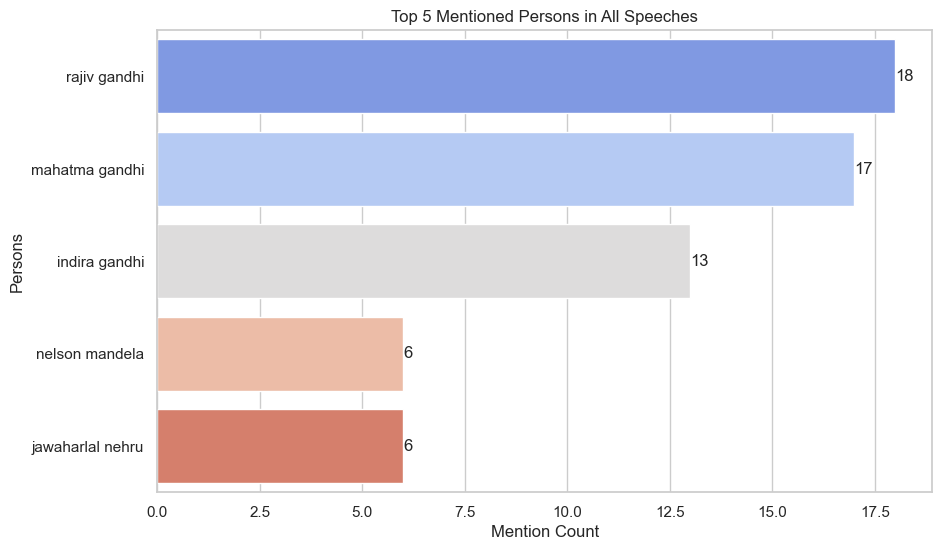

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to count and rank mentions of PERSON entities
def count_person_mentions(data):
    person_counts = {}
    for _, row in data.iterrows():
        for entity, tag in row['ner_tags']:
            if tag == 'PERSON':
                if entity in person_counts:
                    person_counts[entity] += 1
                else:
                    person_counts[entity] = 1
    return person_counts

person_mentions = count_person_mentions(df)

# Top N most mentioned persons
top_n = 5
top_persons = dict(sorted(person_mentions.items(), key=lambda item: item[1], reverse=True)[:top_n])

# Bar chart
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=list(top_persons.values()), y=list(top_persons.keys()), palette="coolwarm")

plt.title(f"Top {top_n} Mentioned Persons in All Speeches")
plt.xlabel("Mention Count")
plt.ylabel("Persons")

# Labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.0f}', ha='left', va='center')

plt.show()


4) Using cosine similarities and tfidf, can you determine which other country has the same outlook as the countyr you have selected? Can you determine allies from enemies this way?

In [20]:
selected_countries = ["IND", "USA", "DEU", "CAN", "CHN"]

# Filter the DataFrame to select specific countries
df_five = df_all[df_all["country"].isin(selected_countries)]
df_five = df_five.reset_index(drop=True)
df_five.head(5)


,session,year,country,text
0,44,1989,CHN,﻿\nPermit me to begin by warmly congratulating...
1,44,1989,CAN,"﻿In view of your remarks, Mr. President, I am ..."
2,44,1989,DEU,"﻿\nI congratulate you, Sir, on your election a..."
3,44,1989,IND,﻿\nMy delegation warmly welcomes the assumptio...
4,44,1989,USA,﻿I am honoured to address the General Assembly...


In [21]:
df_five.shape

(226, 4)

In [22]:
import re
import spacy

def clean_text(text):
    # Special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Lower casing
    text = text.lower()

    # Newline and TabSpace removal
    text = re.sub(r'[\n\t]', ' ', text)

    return text

df_five["text"] = df_five['text'].apply(clean_text)

# Tokenize
nlp = spacy.load("en_core_web_sm")
df_five['tokens'] = df_five['text'].apply(nlp)

# Remove STOP words
def remove_stopwords(text_words):
    filtered_words = [token.text for token in text_words if not token.is_stop]
    return filtered_words
df_five['tokens'] = df_five['tokens'].apply(remove_stopwords)

# Removing empty tokens
df_five['tokens'] = df_five['tokens'].apply(lambda words: [word for word in words if word.strip()])
df_five.head()

,session,year,country,text,tokens
0,44,1989,CHN,permit me to begin by warmly congratulating y...,"[permit, begin, warmly, congratulating, sir, e..."
1,44,1989,CAN,in view of your remarks mr president i am a li...,"[view, remarks, mr, president, little, embarra..."
2,44,1989,DEU,i congratulate you sir on your election as pr...,"[congratulate, sir, election, president, gener..."
3,44,1989,IND,my delegation warmly welcomes the assumption ...,"[delegation, warmly, welcomes, assumption, amb..."
4,44,1989,USA,i am honoured to address the general assembly ...,"[honoured, address, general, assembly, today, ..."


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Initialize an empty DataFrame to store similarity scores
similarity_scores = pd.DataFrame()

# Filter out India
df_other = df_five[df_five['country'] != 'IND']

# Initialize an empty list to store DataFrames
similarity_dfs = []

# Group the DataFrame by 'country' and apply TF-IDF and cosine similarity within each group
for name, group in df_other.groupby('country'):
    # Check if 'IND' is in the group
    if 'IND' in df_five['country'].values:
        # Fit and transform the TF-IDF vectorizer on the 'tokens' column within the group
        tfidf_matrix = tfidf_vectorizer.fit_transform(group['tokens'].apply(' '.join))

        # Check if 'IND' is in the group
        if 'IND' in group['country'].values:
            # Find the index of the country 'IND' within the group
            india_index = group[group['country'] == 'IND'].index[0]

            # Get cosine similarity scores for India with all other countries within the group
            india_similarity_scores = cosine_similarities[india_index]
        else:
            # Handle the case where 'IND' is not in the group
            india_similarity_scores = [0] * len(group)

        # Create a DataFrame to store similarity scores within the group
        group_similarity_df = pd.DataFrame({
            'Country': group['country'],
            'Similarity Score': india_similarity_scores
        })

        # Append the group-specific similarity scores to the list
        similarity_dfs.append(group_similarity_df)

# Check if there are data frames to concatenate
if similarity_dfs:
    # Concatenate the list of DataFrames into a single DataFrame
    similarity_scores = pd.concat(similarity_dfs, ignore_index=True)

    # Sort the overall DataFrame by similarity score in descending order
    similarity_scores = similarity_scores.sort_values(by='Similarity Score', ascending=False)

    # Display the top N countries with a similar outlook to India
    N = 5  # Change this value to see more or fewer similar countries
    similar_countries = similarity_scores.head(N)

    # Print the similar countries
    print("Countries with a similar outlook to India:")
    print(similar_countries)
else:
    print("No other countries found for comparison.")




Countries with a similar outlook to India:
    Country  Similarity Score
0       CAN                 0
113     DEU                 0
115     DEU                 0
116     DEU                 0
117     DEU                 0


Comparing the cosine similarity between first Indian speech to subsequent Indian speeches of later years : Seems like there is a consistent Similarity

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the TF-IDF vectorizer on the 'tokens' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df_five['tokens'].apply(' '.join))

# Calculate cosine similarity between all countries
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Find the index of India in the DataFrame
india_index = df_five[df_five['country'] == 'IND'].index[0]

# Get cosine similarity scores for India with all other countries
india_similarity_scores = cosine_similarities[india_index]

# Create a DataFrame to show countries and their similarity scores with India
similarity_df = pd.DataFrame({'Country': df_five['country'], 'Similarity Score': india_similarity_scores})

# Sort the DataFrame by similarity score in descending order
similarity_df = similarity_df.sort_values(by='Similarity Score', ascending=False)

# Display the top N countries with a similar outlook to India
N = 5  # Change this value to see more or fewer similar countries
similar_countries = similarity_df.head(N)

# Print the similar countries
print("Countries with a similar outlook to India:")
print(similar_countries)


Countries with a similar outlook to India:
    Country  Similarity Score
3       IND          1.000000
64      IND          0.456315
73      IND          0.450965
25      IND          0.443441
193     IND          0.428217


5) Any exploratory analysis you like. Trends of top 5 most used person names per year

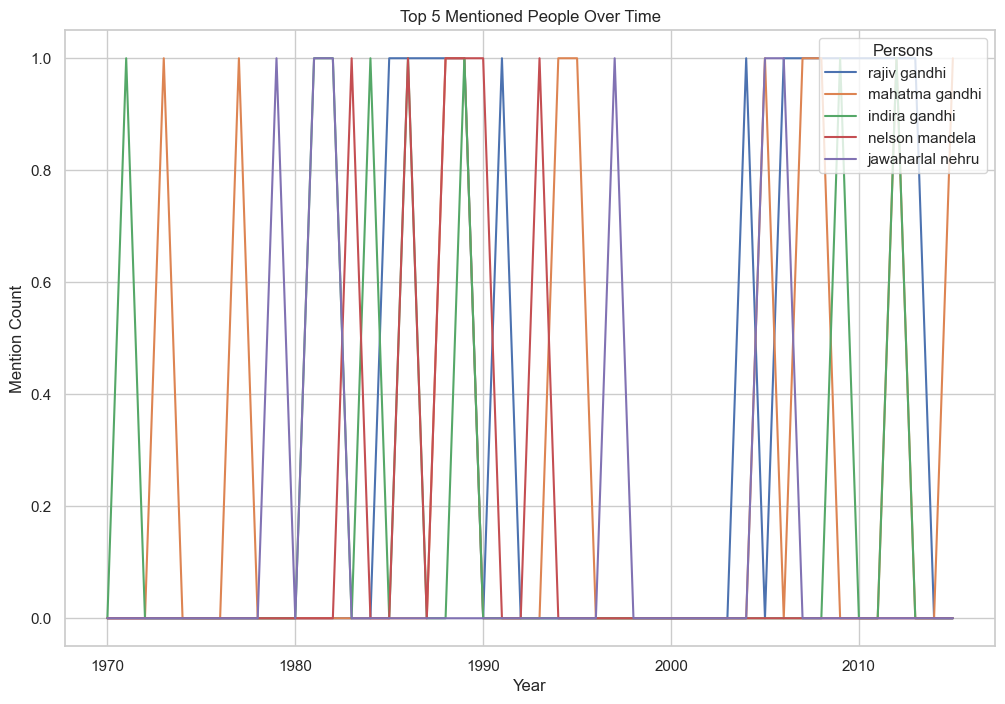

In [ ]:
#task 5
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the top N persons by year
top_persons_df = pd.DataFrame(columns=['Year'] + list(top_persons.keys()))
years = df['year'].unique()
top_persons_df['Year'] = years

for person in top_persons.keys():
    mentions_by_year = []
    for year in years:
        mentions_by_year.append(sum(1 for _, row in df.iterrows() if row['year'] == year and (person, 'PERSON') in row['ner_tags']))
    top_persons_df[person] = mentions_by_year

# Time series graph
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

for person in top_persons.keys():
    sns.lineplot(data=top_persons_df, x='Year', y=person, label=person)

plt.title(f"Top {top_n} Mentioned People Over Time")
plt.xlabel("Year")
plt.ylabel("Mention Count")
plt.legend(title="Persons", loc="upper right")

plt.show()
